<h2> Определение перспективного тарифа для телеком-компании «Мегалайн» </h2> 
    
Телеком-компании «Мегалайн» предлагает два тарифных плана: «Смарт» и «Ультра».
    
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    
В данном кейсей проведен предварительный анализ тарифов на небольшой выборке клиентов в 500 пользователей и их активности (количество звонков, смс-сообщений, трафика)  за 2018 год. 
    
Цель анализа - сделать выводы о поведение клиентов и дать заключение — какой тариф лучше, а так же подготовить данные для последующих рекламных компаний. 
    
В ходе анализа для достижения поставленных целей реализовано: проведна по приведению данных к нужно

1. Данные приведены к нужным типам, подготовлены для объединения в общую сводную таблицу, сформирован общий сводный датасет по каждому пользователю.
2. Для каждого пользователя расчитано количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя.
3. Проанализированы данные о поведение клиентов оператора, исходя из полученной выборки. Расчитано, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Расчитано среднее количество, дисперсию и стандартное отклонение. Для всех данных построены графики и приведено их описание 
4. Проверены 2 гипотезы:
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

# 1. Открываем файлы с данными и изучаем общую информацию

In [1]:
#Загружаем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Настраиваем библиотеку seaborn
sns.set_palette(palette='Set2')
sns.set(style='whitegrid')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [3]:
# Грузим наши датафрейм файлы, осматривемся, прикидываем дальнейший ход анализа
calls=pd.read_csv('/datasets/calls.csv')
inet=pd.read_csv('/datasets/internet.csv')
tariffs=pd.read_csv('/datasets/tariffs.csv')
users=pd.read_csv('/datasets/users.csv')
messages=pd.read_csv('/datasets/messages.csv')

#messages.info()
#messages.head()

**Вывод:** Что можно сказать на данном этапе? 5 датафреймов с различным качеством и количеством данных. Во всех датафреймах в глаза бросается различный тип данных некоторых столбцов, который не сосем им подходит. Будем исправлять. 

Так же на этапе предпросмотра видим, что исходя из пользовательских id и периодов, можно сделать вывод, что некоторыми услугами пользователи в течении отчетного месяца могли не воспользоваться, в связи с чем по часть id есть информация в одних датафреймах о пользовании услугой, но нет в других. К примеру, пользователь с id 1001 пользовался интернетом, но совсем не совершал звонков  и т.д.

На следующем этапе нашего анализа добавим столбец с месяцем использования услуги, а так же наведем порядок с типами данных. Наша основная задача на этом этапе — подготовить датафреймы с данными об использовании отдельных услуг к слиянию в общую таблицу с абонентскими активностями по месяцам по всем пользователям. Приступим.

# 2. Подготавливаем данные

In [4]:
# Первая на очереди - таблица со статистикой звонков. В ней необходимо добавить месяц пользования услугами и произвести 
# помесячно округление количества звонков, в соответсвии с условиями задачи нам это понадобится в дальнейшей работе

calls['call_date']= pd.to_datetime(calls['call_date'], format='%Y-%m-%d') #задаем временной формат данных для столбца call_date
calls['call_mounth'] = pd.DatetimeIndex(calls['call_date']).month #извлекаем месяц пользования услугой в отдельный столбец
calls['duration'] = np.ceil(calls['duration']) #округляем каждый звонок до целой минуты
print('Количество явных дубликатов в датафрейме',calls.duplicated().sum())
print()
calls.info()
display(calls.head(5))

Количество явных дубликатов в датафрейме 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           202607 non-null  object        
 1   call_date    202607 non-null  datetime64[ns]
 2   duration     202607 non-null  float64       
 3   user_id      202607 non-null  int64         
 4   call_mounth  202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,call_mounth
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Все ок, идем дальше.

In [5]:
# Наводим порядок в следующем датафрейме с данными об использовании мобильного интернета. Удалим бесполезный столбец, настроим 
# тип данных в столбце session_date

inet['session_date'] = pd.to_datetime(inet['session_date'], format='%Y-%m-%d') #задаем временной формат данных для столбца
inet['session_mounth'] = pd.DatetimeIndex(inet['session_date']).month #извлекаем месяц пользования услугой в отдельный столбец
inet = inet.drop(['Unnamed: 0'], axis = 1) #бесполезные столбцы нам не нужны, прощаемся с ними

print(inet.duplicated().sum())
inet.info() 
display(inet.head(5))

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              149396 non-null  object        
 1   mb_used         149396 non-null  float64       
 2   session_date    149396 non-null  datetime64[ns]
 3   user_id         149396 non-null  int64         
 4   session_mounth  149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id,session_mounth
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


С типами данных все ок, бесполезных столцов нет, едим дальше.

In [6]:
# Загляним в файл с данными об использовании СМС, ничего криминального, нужно только дабавить столбец с месяцем

messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['message_mounth'] = pd.DatetimeIndex(messages['message_date']).month

print('Количество явных дубликатов в датафрейме',messages.duplicated().sum())
messages.info()
display(messages.head(5))

Количество явных дубликатов в датафрейме 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              123036 non-null  object        
 1   message_date    123036 non-null  datetime64[ns]
 2   user_id         123036 non-null  int64         
 3   message_mounth  123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,message_mounth
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Все ок, идем дальше.

In [7]:
# Датасет с информацией о пользователях меня порядком заинтересовал, особенно проверкой гипотезы о фактах двойной записи об
# юзерах, сменивших тарифный план и внесенных в наш датасет под отдельным новым id. 
# Чтобы проверить такие случаи, заведем новый столбец с данными, содержащими информацию об имени и фамилии пользователя,
# а так же о его городе, и проверим данный столбец на уникальность. 
# Ну и конечно же не забудем проверить весть датасет на явные дубликаты и поменять формат данных для столбца с датой и 
# извлечь из него значение месяца


users['churn_date']= pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

print('Количество явных дубликатов в датафрейме', users.duplicated().sum())
display(users.head())
users.info()
#users.sort_values('last_name', ascending=False).head(30)

#Проверка наличия в датасете пользователей, поменявших тарифный план (двойной записи) и получивших после этого новый id
users['test'] = users['last_name'] + users ['first_name'] + users['city']
print ()
print('Уникальных записей в таблице =', users['test'].nunique())
users = users.drop(['test'], axis = 1)


Количество явных дубликатов в датафрейме 0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

Уникальных записей в таблице = 500


Никакого задваивания в именах пользователей не обнаруженно, смотрим дальше.

In [8]:
# Посмотрим датасет с информацией о тарифах.

# display(tariffs.head()) 
tariffs.info()
tariffs = tariffs.rename(columns={"tariff_name": "tariff"}) # переименуем столбец с названием тарифа аналогично другим датасетам
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Следующим этапом нам необзодимо сгрупировать наши  датасеты по столбам `user_id` и `mounth`, для этого воспользуемся инструментом сводной таблицы. 

In [9]:
# Певый пошел!..

calls_pivot = calls.pivot_table(index = ['user_id', 'call_mounth' ],  values = 'duration', aggfunc = ['count', 'sum']).reset_index()
calls_pivot.columns=['user_id', 'mounth', 'count_call','sum_call']
calls_pivot.info()
calls_pivot.head() # Все ок, успешно!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     3174 non-null   int64  
 1   mounth      3174 non-null   int64  
 2   count_call  3174 non-null   int64  
 3   sum_call    3174 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 99.3 KB


,user_id,mounth,count_call,sum_call
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [10]:
#..Второй пошел!
messages_pivot = messages.pivot_table(index = ['user_id', 'message_mounth' ], values = 'id', aggfunc = 'count').reset_index()
messages_pivot.columns=['user_id', 'mounth', 'count_messages']
messages_pivot.info()
messages_pivot.head(5) #Красота

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2717 non-null   int64
 1   mounth          2717 non-null   int64
 2   count_messages  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


,user_id,mounth,count_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [11]:
# На очереди табличка с интернетом, делаем сводную в одном духе с другими таблицами.

inet_pivot = inet.pivot_table(index = ['user_id', 'session_mounth'], values = 'mb_used', aggfunc = 'sum').reset_index()
inet_pivot.columns=['user_id', 'mounth', 'sum_session']
inet_pivot.info()
inet_pivot.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3203 non-null   int64  
 1   mounth       3203 non-null   int64  
 2   sum_session  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


,user_id,mounth,sum_session
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [12]:
# Объединяем получившиеся сводные таблицы и считаем в ней выручку помесячно по каждому из абонентов.

df = calls_pivot.merge(messages_pivot, how = 'outer', on = ['user_id', 'mounth'])
df = df.merge(inet_pivot,how = 'outer', on = ['user_id', 'mounth'])

#есть 2 пользователя с нулевой активностью по услугам, не пользовавшихся 
#услугами разговоров, интернета или смс. Эти пользователи разорвали контракт в первый месяц подключения.  Включаем данные о них 
# в общую таблицу для учета абонентской платы по ним
df = df.merge(users, how = 'outer', on = 'user_id')
df = df.merge(tariffs , how = 'left', on = 'tariff')

# Видим тип данных float в некоторых столбцах в результате объединения. Это, вероятнее всего, связано с наличием пропусков в 
# данных столцах, образовавшихся в результате объединения. Уберем пропуски в данных о звонках, смс и трафике на "0", так как  
# логично сделать вывод - что если данных об использовании нет, то абонент не прибегал к данным видам услуг. Пропуски по 
# месяцам для двух абонентов без активностей заполним в соответсвии с месяцем регистрации абонетов - декабрем. 
# За одно наведем порядок с типами данных по столбцам.

df['mounth'] = df['mounth'].fillna(12)
df[['count_call', 'sum_call', 'count_messages', 'sum_session']] = df[
    ['count_call', 'sum_call', 'count_messages','sum_session']].fillna(value=0)
df[['mounth','count_call', 'sum_call', 'count_messages']] = df[
    ['mounth','count_call', 'sum_call', 'count_messages']].astype('int64')
df.info()



def money_calc(data):
    money = 0
    money += data['rub_monthly_fee'] 
    
    message = (data['count_messages'] - data['messages_included'])
    minutes = (data['sum_call'] - data['minutes_included'])
    session = (data['sum_session'] - data['mb_per_month_included'])
 

    if message > 0:
        money += data['rub_per_message']*message 
    
    if minutes > 0:
        money += minutes* data['rub_per_minute'] 
  
    if session > 0:
        session = session/1024
        session = np.ceil(session)
        money += session * data['rub_per_gb'] 

    return money 

df['revenue'] = df.apply(money_calc, axis = 1)

display(df.sample(5)) #смотрим 5 случайных строк из датафрейма

print( "Выручка по всем абонентам  из выборки за год составила ", df['revenue'].sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   mounth                 3216 non-null   int64         
 2   count_call             3216 non-null   int64         
 3   sum_call               3216 non-null   int64         
 4   count_messages         3216 non-null   int64         
 5   sum_session            3216 non-null   float64       
 6   age                    3216 non-null   int64         
 7   churn_date             189 non-null    datetime64[ns]
 8   city                   3216 non-null   object        
 9   first_name             3216 non-null   object        
 10  last_name              3216 non-null   object        
 11  reg_date               3216 non-null   datetime64[ns]
 12  tariff                 3216 non-null   object        
 13  mes

,user_id,mounth,count_call,sum_call,count_messages,sum_session,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
1745,1280,10,91,619,44,20183.65,53,NaT,Астрахань,Артемий,...,2018-07-18,smart,50,15360,500,550,200,3,3,1907.0
29,1004,12,21,130,162,18021.04,68,NaT,Новокузнецк,Татьяна,...,2018-05-14,ultra,1000,30720,3000,1950,150,1,1,1950.0
1647,1264,9,54,464,26,15890.58,47,NaT,Хабаровск,Саида,...,2018-04-22,smart,50,15360,500,550,200,3,3,750.0
3119,1490,7,34,250,62,10793.13,30,NaT,Москва,Радомир,...,2018-04-03,smart,50,15360,500,550,200,3,3,586.0
411,1065,3,65,480,52,19579.45,53,2018-12-09,Москва,Роза,...,2018-03-08,smart,50,15360,500,550,200,3,3,1556.0


Выручка по всем абонентам  из выборки за год составила  4916951.0


Итак, мы сформировали датасет с данными об активности каждого абонента «Мегалайн» по месяцам, заполнили пропуски и посчитали выручку. Приступаем к анализу данных.

smart    0.693408
ultra    0.306592
Name: tariff, dtype: float64

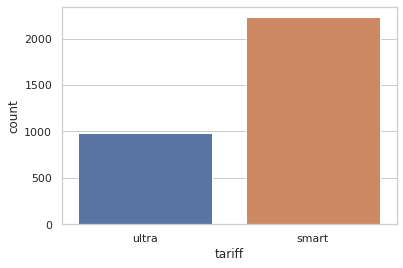

In [13]:
sns.countplot(df['tariff'])  
df['tariff'].value_counts(normalize=True)

Более 2/3 наших абонентов, а если быть точным то 69,3 %, пользуются тарифом "Смарт". Можно сделать вывод о наличии дисбаланса в датасете.

In [14]:
# Посмотрим, какая информация содержится в текстовых строках нашего датафрейма. С помощью метода describe вызовим\
# описательную статистику по ним
df.describe(include=['object'])

,city,first_name,last_name,tariff
count,3216,3216,3216,3216
unique,76,246,419,2
top,Москва,Мариетта,Андреенко,smart
freq,611,39,35,2230


Фух, сразу полегчало. Типичный абонент в нашей выборки - Мариетта Андреенко из Москвы с тарифом "Смарт" =) 

Ну а если без шуток, то дидим, что в выбоку попали абоненты из 76 городов и самое большое количество находится (или зарегистрированно) в Москве. Почти 19%. 

In [15]:
# Данные о стоимости трафика, минут и смс сверх тарифных планов нам уже ни к чему, избавимся от них.

df = df.drop(['rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis=1)


**Вывод:** На данном этапе анализа нам  удалось переработать и объединить данные по всем видам услуг помесячно для каждого абонента, а так же расчитать сумму выручки по всем абонентам из выборки. Выручка составила 4 916 951 рублей. Можно переходить к следующему этапу анализа.

# 3. Анализ данных

In [16]:
# Для  анализа поведения клиентов постороим сводную  таблицу по месяцам и тарифным планам, в которой расчитаем сколько 
# в среднем минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.
# Так же в соответсвии с условиями задания расчитаем среднее количество, дисперсию и стандартное отклонение.

df_pivot= df.pivot_table(index = ['tariff','mounth'], 
                     values = ['sum_call','count_messages','sum_session'], aggfunc = ['mean', 'var','std']).round(1).reset_index()
df_pivot.columns=['tariff','mounth','count_messages_mean', 'sum_call_mean', 'sum_session_mean', 'count_messages_var',
             'sum_call_var','sum_session_var','count_messages_std', 'sum_call_std', 'sum_session_std']

df_pivot.describe()

,mounth,count_messages_mean,sum_call_mean,sum_session_mean,count_messages_var,sum_call_var,sum_session_var,count_messages_std,sum_call_std,sum_session_std
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000
mean,6.500000,37.545833,441.112500,16623.395833,1314.516667,64346.091667,6.549562e+07,34.770833,245.333333,7803.658333
std,3.526299,11.115480,91.733723,3191.418629,769.752686,32934.362578,3.507605e+07,10.513159,65.841507,2190.523618
min,1.000000,18.200000,203.900000,8513.700000,262.400000,23787.300000,2.699962e+07,16.200000,154.200000,5196.100000
25%,3.750000,32.200000,394.225000,15583.450000,775.700000,34789.750000,3.386064e+07,27.825000,186.500000,5818.950000
50%,6.500000,33.800000,431.950000,16792.600000,887.150000,55956.150000,4.433345e+07,29.800000,234.150000,6655.000000
75%,9.250000,43.375000,510.425000,19244.025000,2027.950000,94884.250000,9.885029e+07,45.050000,308.025000,9942.150000
max,12.000000,60.200000,588.600000,21637.500000,2697.200000,118942.800000,1.199416e+08,51.900000,344.900000,10951.800000


Вывод

In [17]:
# возьмем описательную статистику по тарифу "Смарт"
df_pivot[df_pivot['tariff']=='smart'].describe()


,mounth,count_messages_mean,sum_call_mean,sum_session_mean,count_messages_var,sum_call_var,sum_session_var,count_messages_std,sum_call_std,sum_session_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000
mean,6.500000,31.408333,386.650000,15053.950000,715.058333,33766.591667,3.367810e+07,26.475000,183.416667,5793.858333
std,3.605551,5.105872,72.085335,2665.668535,185.926552,4045.989385,4.019744e+06,3.965791,11.435736,345.347615
min,1.000000,18.200000,203.900000,8513.700000,262.400000,23787.300000,2.699962e+07,16.200000,154.200000,5196.100000
25%,3.750000,31.600000,382.325000,14693.700000,689.400000,32089.025000,3.178017e+07,26.225000,179.150000,5637.300000
50%,6.500000,33.600000,402.000000,15799.900000,795.250000,34785.900000,3.375292e+07,28.200000,186.500000,5809.700000
75%,9.250000,33.800000,426.725000,16647.300000,809.125000,35647.300000,3.501714e+07,28.450000,188.775000,5917.450000
max,12.000000,35.900000,477.100000,18060.100000,936.000000,40258.400000,4.153391e+07,30.600000,200.600000,6444.700000


In [18]:
# посмотрим описательную статистику по тарифу "Ультра"
df_pivot[df_pivot['tariff']=='ultra'].describe()


,mounth,count_messages_mean,sum_call_mean,sum_session_mean,count_messages_var,sum_call_var,sum_session_var,count_messages_std,sum_call_std,sum_session_std
count,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,1.200000e+01,12.000000,12.000000,12.000000
mean,6.500000,43.683333,495.575000,18192.841667,1913.97500,94925.591667,9.731315e+07,43.066667,307.250000,9813.458333
std,3.605551,12.250850,76.988525,2969.220810,648.30401,14537.886135,1.864332e+07,8.075815,23.856941,1049.157060
min,1.000000,22.000000,297.100000,11775.900000,716.80000,71653.900000,4.713299e+07,26.800000,267.700000,6865.300000
25%,3.750000,33.425000,474.275000,17358.725000,1570.27500,86907.325000,9.333558e+07,39.600000,294.775000,9660.475000
50%,6.500000,45.050000,510.550000,19283.750000,2069.60000,95446.200000,9.954163e+07,45.500000,308.950000,9976.800000
75%,9.250000,53.175000,542.500000,19851.425000,2398.22500,105903.750000,1.099008e+08,48.975000,325.400000,10483.375000
max,12.000000,60.200000,588.600000,21637.500000,2697.20000,118942.800000,1.199416e+08,51.900000,344.900000,10951.800000


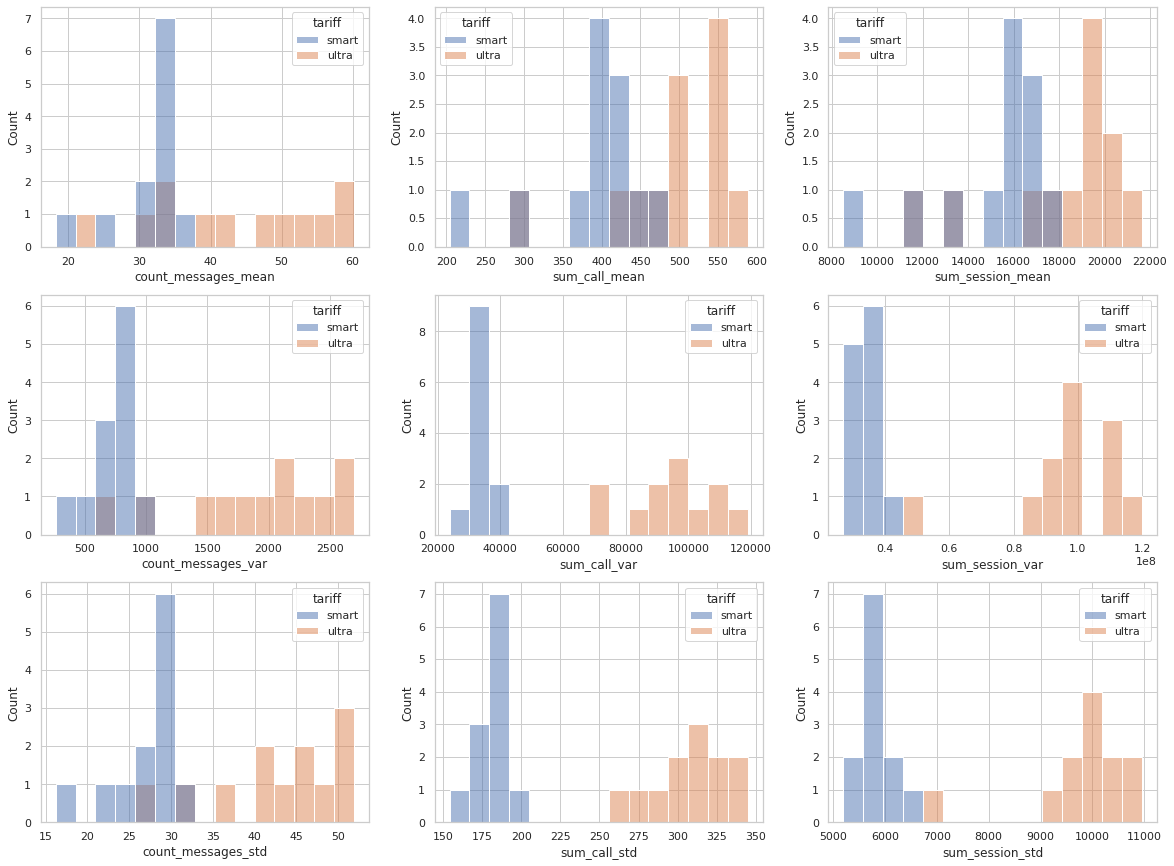

In [19]:
# отобразим данные о средних значениях звонков, отправленных смс-сообщений, мобильного трафика, а так же об дисперсии и 
# стандартных отклонениях на графиках. Построим гистограммы, диаграммы размаха и столбчатые графики и проанализируем их. 
fig, axs = plt.subplots(3,3, figsize=(20,15))
axs = axs.ravel()
chart_list = ['count_messages_mean', 'sum_call_mean', 'sum_session_mean', 'count_messages_var',
              'sum_call_var','sum_session_var','count_messages_std', 'sum_call_std', 'sum_session_std']
for idx,axes in enumerate(axs):
    
    sns.histplot(ax=axes, data = df_pivot, x=df_pivot[chart_list].iloc[:,idx], hue = 'tariff', alpha = 0.5, bins = 15)
    

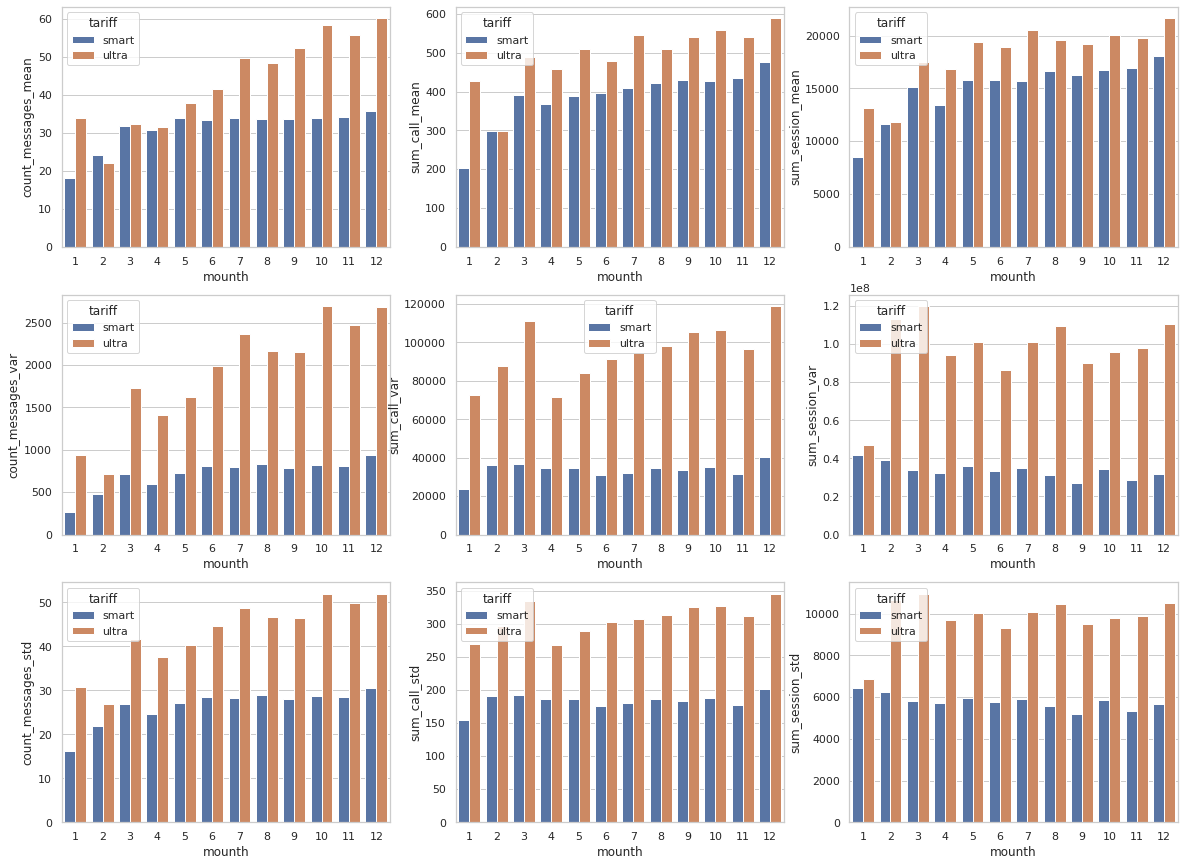

In [20]:
fig, axs = plt.subplots(3,3, figsize=(20,15))
axs = axs.ravel()

for idx,axes in enumerate(axs):
    
    sns.barplot(ax=axes, data=df_pivot, x = 'mounth', y=df_pivot[chart_list].iloc[:,idx], hue = 'tariff')

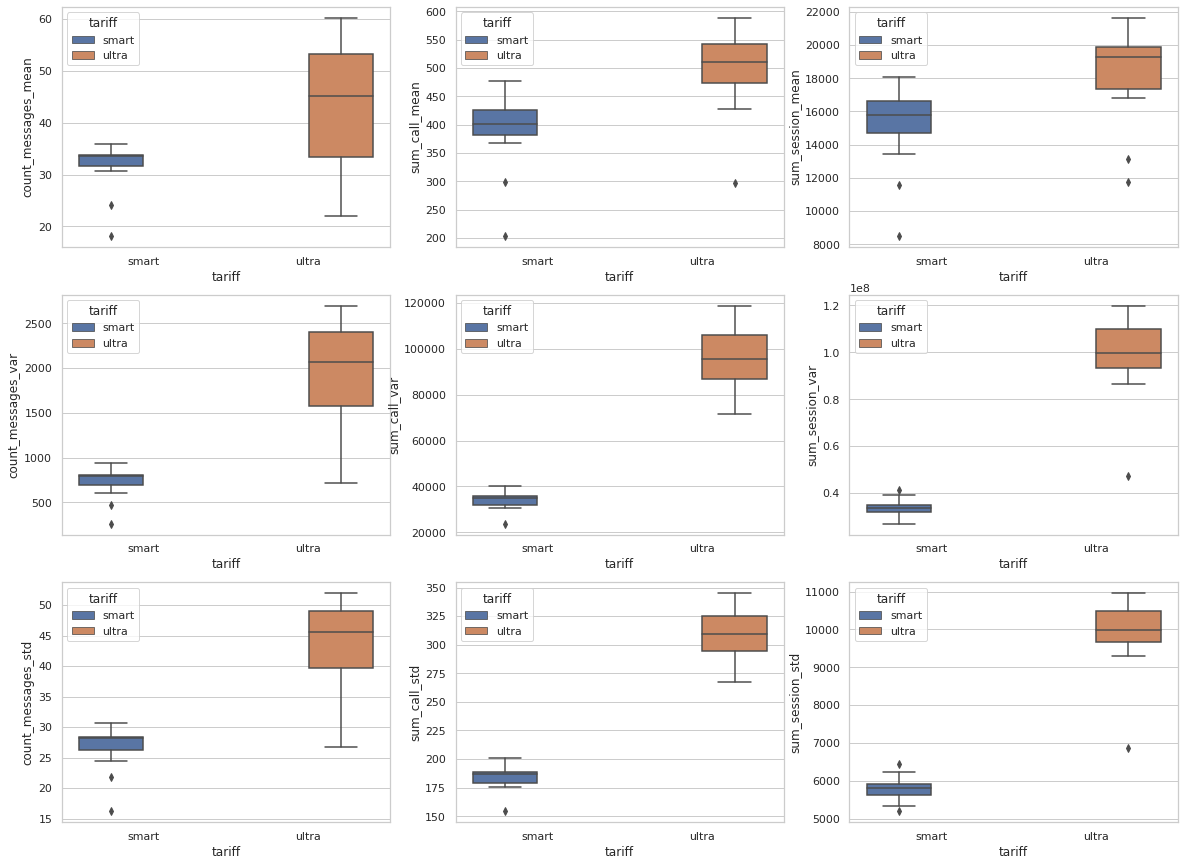

In [21]:
fig, axs = plt.subplots(3,3, figsize=(20,15))
axs = axs.ravel()

for idx,axes in enumerate(axs):
    
    sns.boxplot(ax=axes,data=df_pivot, x='tariff', y = df_pivot[chart_list].iloc[:,idx], hue = 'tariff')

**Вывод:** Каждый пользователь тарифа «Смарт» в месяц отправляет 31 смс-сообщение,  совершает 387 минут разговоров и потребляет 14,7 Гб интернет трафика. Можно сделать вывод о том, что среднестатистический пользователь тарифа «Смарт» предпочитает потреблять телекома в рамках своего тарифного плана, не прибегая к дополнительным услугам. В течении года не зафиксировано превышение средних значений отправленных смс-сообщений и количества использованных минут от входящих в тарифный план. Однако обратим внимание, превышение средних объемов потребляемого трафика зафиксировано в 6 месяцах из года. 

В целом, если рассуждать об активности пользователей, то мы видим, что самыми  малоактивными месяцами для абонентов тарифа «Смарт» стали  январь и февраль. В данные месяцы пользователи в среднем значительно меньше тратили минут разговора, отправляли смс-сообщений и потребляли трафика по сравнению с остальными месяцами. Так же можно отметить, что в период с марта по ноябрь на тарифе «Смарт» объем потребления услуг проходит без особых всплесков и показывает нам сдержанный рост потребления услуг. А вот декабрь для абонентов «Смарт» становится самым оживленным месяцем, здесь среднестатистический пользователь максимально приближается к верхней планке включенных в тарифный план минут и ставит рекорд по объему потребленного трафика. 

Рассмотрим среднемесячное  потребление услуг абонентом тарифного плана «Ультра». Среднегодовое потребление услуг на тарифе «Ультра» составило 43,7 смс, 496,6 минут разговора и 18192 Мб интернет-трафика. В отличии от абонентов тарифного плана «Смарт», превышений объемов услуг, входящих в пакет тарифного плана среднестатистическим абонентом «Ультры» не зафиксировано.  Аналогично пользователям тарифа «Смарт», у абонентов «Ультры» самый активный месяц – декабрь с 60 отправленными смс сообщениями, почти 600 минут разговора и почти 21,1 Гб интернет трафика. Самый малоактивный месяц – февраль, когда пользователи выговаривают около 300 минут, отправляют чуть больше 20 смс и скачивают 11,5 ГБ интернет-трафика и по объему потребления услуг в этот месяц сравниваются с тарифом «Смарт».

В целом, среднестатистический абонент «Ультры» потребляют в месяц больше смс, трафика, минут разговора по сравнению с абонентом «Смарта».

Среднеквадратическое отклонение в нашем кейсе покажет нам, какой дополнительный объем выручки удавалось зарабатывать телекому на абонентах  за предоставление услуг сверх пакетов тарифных планов. В целом мы видим, что на тарифе «Ультра» абонентам присуще больший разброс в объемах потребляемых услуг, однако даже не смотря на это можно сказать что абоненты в основном укладываются в лимит данного тарифного плана. К примеру, учитывая объем предусмотренного в тарифном плане «Ультра»  30 ГБ трафика, при среднегодовом значении среднеквадратического отклонения 9,7 ГБ и средней в 17,7 ГБ, можно сказать, что пользователям в среднем хватало объемов предусмотренного  трафика и докупка абонентами пакетов с трафиком носила разовый характер. 

С абонентами «Смарт» все гораздо интересней. Учитывая ограниченность по включенным в пакет тарифа услуг (500 минут разговора, 50 сообщений и 15 Гб интернет-трафика), и видя среднеквадратичное отклонение по году 26.4 смс, 183.4 минут и 5793.8 мб трафика делаем вывод при среднегодовом объеме потребления 31 смс-сообщение,  387 минут разговора и потребляет 14,7 ГБ трафика, что более 50% пользователей не умещались в пакет тарифного плана и генерировали нам выручку, приобретая дополнительные минуты, смс и ГБ. Причем видя среднеквадратическое отклонение в 5,6 ГБ ежемесячно, можно сказать что такая доля выручки была для нас существенна.

Так же хотелось бы отметить, что 7,6 % абонентов отказались от услуг нашего телекома за год. Чтобы быть объективными в оценки данного показателя, конечно, необходимо больше данных: какая текучка была у абонентов в предыдущие года, сколько в среднем данный показатель составляет по отрасли, что послужило мотивом абонента сменить оператора.  Но все равно, на мой взгляд текучка в 7,6% и сильный перекос (69%) в количестве абонентов на тарифе «Смарт»  может свидетельствовать о наличии определенного дисбаланса нашей абонентской базы.

Итак, как поступить с полученными данными. Безусловно, поделиться ими с маркетологами =) На мой взгляд, нашему телекому не хватает промежуточного тарифного плана, включающего в себя пакет услуг с промежуточными объемами по сравнению с тарифом «Ультра». Что-то в духе включенных в тариф 75 смс, 750 минут разговора и 20 Гб интернет-трафика по цене районе 1000 рублей. Наличие такого тарифа будет положительно сказываться на средней выручки нашего телекома, так как денежный поток будет гарантированным, при этом абоненты так же будут простимулированы не ограничивать себя в объемах потребления услуг.
Кроме того, как рекомендация «на текущий момент времени», можно предложить в декабре пользователям тарифа «Смарт» переходить в тариф «Ультра», т.к. объемы потребления услуг в этом месяц на двух тарифных планах становятся очень похожи. Ну и самому телекому на январь и февраль  можно рассмотреть возможность запуска дополнительных акций по привлечению новых абонентов, так как нагрузка на мобильного оператора в целом сильно снижается.


# 4. Проверка гипотез

Итак, сформируем гипотезы для проверки.

1)	Нулевая гипотеза Н0: Средняя выручка пользователей тарифа «Ультра» и «Смарт» равны. Альтернативная гипотеза Н1: Средняя выручка пользователей тарифа «Ультра» и «Смарт» не равны между собой.

2)	Нулевая гипотеза Н0:  Средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов. Альтернативная гипотеза Н1: Средняя выручка пользователей из Москвы не равна средней выручки пользователей из других регионов.

Пороговое значение уровня значимости при проверки двух гипотез пример равной 5%.


In [22]:
# Проверка первой гипотезы:
df_smart = df[df['tariff']=='smart']['revenue']
df_ultra = df[df['tariff']=='ultra']['revenue']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_smart,df_ultra, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась, необходимо отвергнуть Н0. Значения средней выручки и пользователей тарифа «Ультра» и «Смарт» не равны между собой.

In [23]:
print (f'Среднее значение  выручки от  абонента тарифа "Смарт" составляет { df_smart.mean():.2f} рублей')
print (f'Среднее значение  выручки от  абонента тарифа "Ультра" составляет { df_ultra.mean():.2f} рублей')

Среднее значение  выручки от  абонента тарифа "Смарт" составляет 1289.64 рублей
Среднее значение  выручки от  абонента тарифа "Ультра" составляет 2070.03 рублей


In [24]:
# Проверка второй гипотезы:

df_msk = df[df['city']=='Москва']['revenue']
df_other = df[df['city']!='Москва']['revenue']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_msk,df_other, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5216952110000279
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтвердилась, значит можно с уверенностью сказать, что средняя выручка от абонентов из регионов совпадает со средней выручки пользователей из Москвы. 

Для второй гипотезы: 


In [25]:
print (f'Среднее значение  выручки от  абонента тарифа "Смарт" составляет { df_msk.mean():.2f} рублей')
print (f'Среднее значение  выручки от  абонента тарифа "Ультра" составляет { df_other.mean():.2f} рублей')

Среднее значение  выручки от  абонента тарифа "Смарт" составляет 1546.71 рублей
Среднее значение  выручки от  абонента тарифа "Ультра" составляет 1524.73 рублей


# 5. Общий вывод

В ходе анализа было выдвинуто 2 гипотезы, в результате проверок которых мы убедились, что абоненты нашего телекома в Москве и остальных городах  в среднем генерируруют выручку одинаково, при этом средняя выручка тарифных планов «Ультра» и «Смарт» отличается.

Поведение абонентов «Смарт» и «Ультра» отличается. 

Среднестатистический абонент «Смарт» стремиться уложиться в объем пакета тарифного плана, при этом объема потребляемого трафика более половины пользователей зачастую не хватает и абоненты вынуждены докупать ГБ ежемесячно. Пользователи «Ультры» чувствовали себя более комфортно, абонентам хватает предлагаемых тарифом минут, смс и интернета. 

Самый активный месяц для наших абонентов – декабрь, самая низкая активность абонентов фикисруется в феврале и январе.

На мой взгляд, телекому не хватает промежуточного тарифного плана, включающего в себя пакет услуг с промежуточными объемами по сравнению с тарифом «Ультра» :  75 смс, 750 минут разговора и 20 Гб интернет-трафика .

Кроме того, можно рассмотреть вопрос проведения  в декабре пользователям тарифа «Смарт» переходить в тариф «Ультра», т.к. объемы потребления услуг в этом месяц на двух тарифных планах становятся очень похожи. Ну и самому телекому на январь и февраль  можно рассмотреть возможность запуска дополнительных акций по привлечению новых абонентов, так как нагрузка на мобильного оператора в целом сильно снижается.


_**Общий вывод ver 2.0:**_

Каждый пользователь тарифа _**«Смарт»**_ в месяц отправляет **31 смс-сообщение, совершает 387 минут разговоров и потребляет 14,7 Гб интернет трафика.** Можно сделать вывод о том, что среднестатистический пользователь тарифа «Смарт» предпочитает потреблять телекома в рамках своего тарифного плана, не прибегая к дополнительным услугам. В течении года не зафиксировано превышение средних значений отправленных смс-сообщений и количества использованных минут от входящих в тарифный план. _Однако, превышение средних объемов потребляемого трафика зафиксировано в 6 месяцах из года._

Cамыми *малоактивными месяцами* для абонентов тарифа «Смарт» стали *январь и февраль.* А вот *декабрь* для абонентов «Смарт» становится *самым оживленным месяцем*, здесь среднестатистический пользователь максимально приближается к верхней планке включенных в тарифный план минут и ставит рекорд по объему потребленного трафика.

Среднегодовое потребление услуг на тарифе _**«Ультра»**_ составило **43,7 смс, 496,6 минут разговора и 18192 Мб интернет-трафика.** В отличии от абонентов тарифного плана «Смарт», превышений объемов услуг, входящих в пакет тарифного плана среднестатистическим абонентом «Ультры» не зафиксировано. 

Аналогично пользователям тарифа «Смарт», у абонентов *«Ультры»* самый *активный* месяц – *декабрь* с 60 отправленными смс сообщениями, почти 600 минут разговора и почти 21,1 Гб интернет трафика. *Самый малоактивный месяц – февраль*, когда пользователи выговаривают около 300 минут, отправляют чуть больше 20 смс и скачивают 11,5 ГБ интернет-трафика и по объему потребления услуг в этот месяц сравниваются с тарифом «Смарт».

**В целом, среднестатистический абонент «Ультры» потребляют в месяц больше смс, трафика, минут разговора по сравнению с абонентом «Смарта».**

Анализ описательной статистики показал, что пользователям *"Ультры" в среднем хватало объемов предусмотренного трафика и докупка абонентами пакетов с трафиком носила разовый характер.*

Описательная статистика активности абонентов *«Смарт»* показала, что наиболее часто абоненты *приобретают сверх пакета дополнительный интернет-трафик, причем выручка от поставки данных услуг для нас была существенной.* 

Так же в ходе анализа были выдвинуты 2 статистические гипотезы:

1) О равенстве средней выручки пользователей тарифа «Ультра» и «Смарт», которая не подтвердилась равны. средняя выручка от абонентов из регионов совпадает со средней выручки пользователей из Москвы.

2)  О равестве средней выручки пользователей из Москвы и средней выручки пользователей из других регионов. Данная гипотеза полностью подтвердилась, средние значения выручки очень схожи. 


Хотелось бы отметить, что **7,6 %** абонентов отказались от услуг нашего телекома за год. Чтобы быть объективными в оценки данного показателя, конечно, необходимо больше данных: какая текучка была у абонентов в предыдущие года, сколько в среднем данный показатель составляет по отрасли, что послужило мотивом абонента сменить оператора. 
На мой взгляд, текучка в **7,6%** и сильный перекос (**69%**) в количестве абонентов на тарифе **«Смарт»** может **свидетельствовать о наличии определенного дисбаланса нашей абонентской базы.**

На мой взгляд, нашему телекому **не хватает промежуточного тарифного плана**, включающего в себя пакет услуг с промежуточными объемами по сравнению с тарифом «Ультра». Что-то в духе включенных в тариф *75 смс, 750 минут разговора и 20 Гб интернет-трафика по цене районе 1000 рублей.*

Кроме того, как рекомендация «на текущий момент времени», можно предложить в декабре пользователям тарифа «Смарт» переходить в тариф «Ультра», т.к. объемы потребления услуг в этом месяц на двух тарифных планах становятся очень похожи. Ну и самому телекому на январь и февраль можно рассмотреть возможность запуска дополнительных акций по привлечению новых абонентов, так как нагрузка на мобильного оператора в целом сильно снижается.
